In [232]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

import warnings
warnings.simplefilter(action='ignore')

In [233]:
# Load the data
data = pd.read_csv('data/game-data-without-pitches.csv')
data.tail()

,join,team_id,opponent_id,league,opponent_league,division,opponent_division,team_side,date,start_time,...,season_game_number,series_game_number,days_since_last_game,day_of_week,away_score,home_score,attendance,duration,score_line,home_win
4855,10/1/2023 DH0 STL,STL,CIN,NL,NL,C,C,Home,10/01/2023,01/10/2023 14:15,...,162,13,1.0,Sun,3,4,44614,136,01300000x,1
4856,10/1/2023 DH0 TB,TB,TOR,AL,AL,E,E,Away,10/01/2023,01/10/2023 15:07,...,162,13,1.0,Sun,12,8,42058,167,170111100,0
4857,10/1/2023 DH0 TEX,TEX,SEA,AL,AL,W,W,Away,10/01/2023,01/10/2023 12:10,...,162,13,1.0,Sun,0,1,43997,121,0,1
4858,10/1/2023 DH0 TOR,TOR,TB,AL,AL,E,E,Home,10/01/2023,01/10/2023 15:07,...,162,13,1.0,Sun,12,8,42058,167,30003110,0
4859,10/1/2023 DH0 WSH,WSH,ATL,NL,NL,E,E,Away,10/01/2023,01/10/2023 15:10,...,162,13,1.0,Sun,10,9,40697,189,410000023,0


In [234]:
data.shape

(4860, 30)

In [235]:
# Drop the columns that are not needed

# Removing unnamed columns using drop function
data.drop(data.columns[data.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

data.drop(['join', 'team_side', 'start_time', 'field_condition', 'series_id', 'away_score', 'home_score', 'score_line'], axis=1, inplace=True)

data.head()

,team_id,opponent_id,league,opponent_league,division,opponent_division,date,doubleheader,time_of_day,sky,...,park_id,temperature_fahrenheit,wind_speed_mph,season_game_number,series_game_number,days_since_last_game,day_of_week,attendance,duration,home_win
0,AZ,LAD,NL,NL,W,W,3/30/2023,0,Night,Sunny,...,LOS03,54,4.0,1,1,NaN,Thu,52075,155,1
1,ATL,WSH,NL,NL,E,E,3/30/2023,0,Day,Sunny,...,WAS11,45,8.0,1,1,NaN,Thu,35756,187,0
2,BAL,BOS,AL,AL,E,E,3/30/2023,0,Day,Sunny,...,BOS07,38,12.0,1,1,NaN,Thu,36049,190,0
3,BOS,BAL,AL,AL,E,E,3/30/2023,0,Day,Sunny,...,BOS07,38,12.0,1,1,NaN,Thu,36049,190,0
4,CHC,MIL,NL,NL,C,C,3/30/2023,0,Day,Sunny,...,CHI11,42,10.0,1,1,NaN,Thu,36054,141,1


In [236]:
# Check for missing values
data.isnull().sum()

team_id                      0
opponent_id                  0
league                       0
opponent_league              0
division                     0
opponent_division            0
date                         0
doubleheader                 0
time_of_day                  0
sky                          0
precipitation             4808
wind_direction               0
park_id                      0
temperature_fahrenheit       0
wind_speed_mph             922
season_game_number           0
series_game_number           0
days_since_last_game        30
day_of_week                  0
attendance                   0
duration                     0
home_win                     0
dtype: int64

In [237]:
# Fill null values with 0
data.fillna(0, inplace=True)

In [238]:
# Where percipation is not 0, replace with 'clear'
data['precipitation'] = data['precipitation'].replace(0, 'clear')

In [239]:
# Date column to a int value
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime("%Y%m%d").astype(int)

In [240]:
# Team columns to unique ints
teams = pd.concat([data['team_id'], data['opponent_id']], axis=0).unique()
encoder.fit(teams)
data['team_id'] = encoder.transform(data['team_id'])
data['opponent_id'] = encoder.transform(data['opponent_id'])

In [241]:
# League columns to unique ints
leagues = pd.concat([data['league'], data['opponent_league']], axis=0).unique()
encoder.fit(leagues)
data['league'] = encoder.transform(data['league'])
data['opponent_league'] = encoder.transform(data['opponent_league'])

In [242]:
# Division columns to unique ints
divisions = pd.concat([data['division'], data['opponent_division']], axis=0).unique()
encoder.fit(divisions)
data['division'] = encoder.transform(data['division'])
data['opponent_division'] = encoder.transform(data['opponent_division'])

In [243]:
# Time_of_day column to unique ints
encoder.fit(data['time_of_day'])
data['time_of_day'] = encoder.transform(data['time_of_day'])

# Sky column to unique ints
encoder.fit(data['sky'])
data['sky'] = encoder.transform(data['sky'])

# Precipitation column to unique ints
encoder.fit(data['precipitation'])
data['precipitation'] = encoder.transform(data['precipitation'])

# Wind_direction column to unique ints
encoder.fit(data['wind_direction'])
data['wind_direction'] = encoder.transform(data['wind_direction'])

# Park_id column to unique ints
encoder.fit(data['park_id'])
data['park_id'] = encoder.transform(data['park_id'])

# Day_of_week column to unique ints
encoder.fit(data['day_of_week'])
data['day_of_week'] = encoder.transform(data['day_of_week'])



In [244]:
# Split the data into test and train
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [245]:
# Prepare the data assuming `X` is your feature matrix and `y` is your target variable
X_train = train_set.drop('home_win', axis=1)
y_train = train_set['home_win']
X_test = test_set.drop('home_win', axis=1)
y_test = test_set['home_win']

In [246]:
# Apply the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

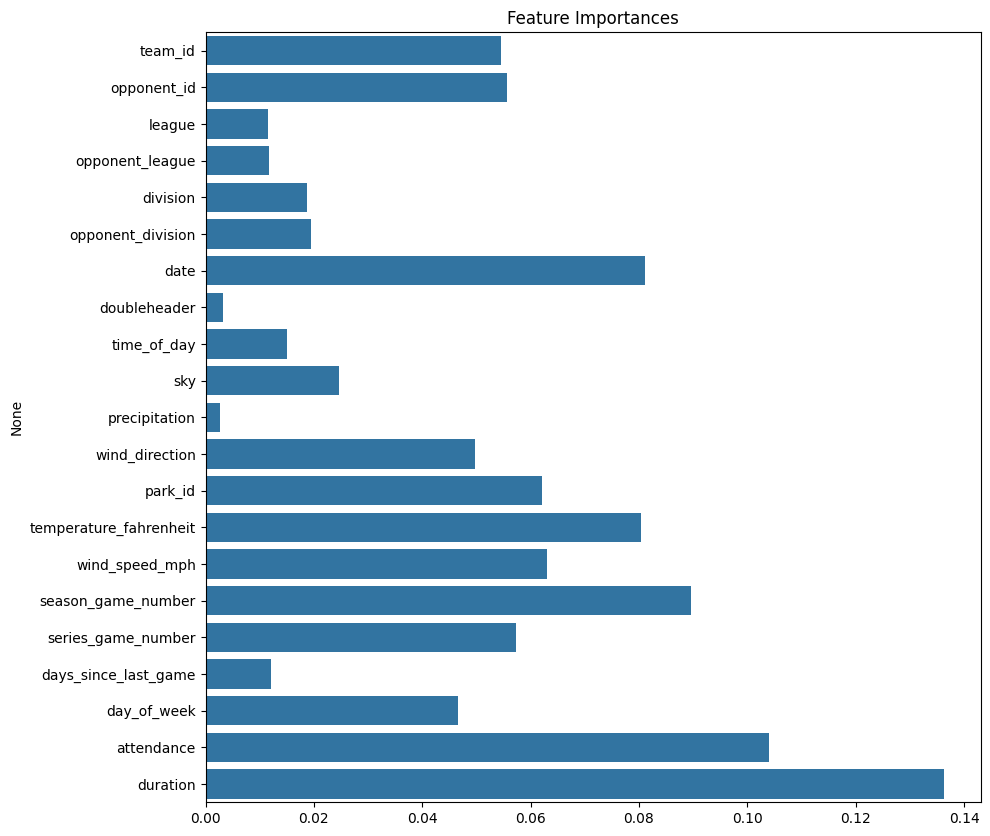

In [247]:
# Graph the feature importances
import matplotlib.pyplot as plt
import seaborn as sns
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(y=features, x=importances, orient='h')
plt.show()

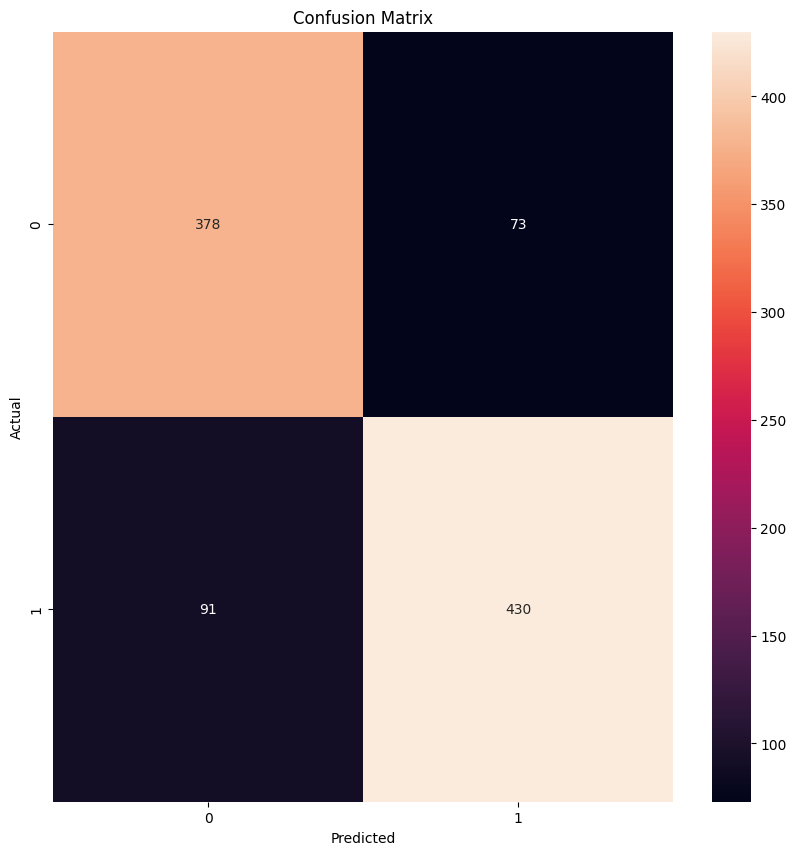

In [248]:
# Graph the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [249]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.831275720164609
